<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, ) - одномерные
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros(X[0].shape[0])
    for i in range(len(X)):
        result += np.dot(X[i], V[i])
    return result


matrix_list = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
vector_list = [np.array([2, 3]), np.array([5, 6])]

print(sum_prod(matrix_list, vector_list))

[ 69. 101.]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
import numpy as np


def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

matrix_one = np.array([[0.3, 0.4],
                        [0.7, 0.5]])
matrix_two = np.array([[400, 16],
                        [57, 117]])

print(binarize(matrix_one))
print(binarize(matrix_two, 100))
print(binarize(matrix_two, 200))

[[0 0]
 [1 0]]
[[1 0]
 [0 1]]
[[1 0]
 [0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
import numpy as np


def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    mat = np.transpose(mat)
    return [np.unique(row) for row in mat]

matrix_one = np.array([[1,2],[3,4]])
matrix_two = np.array([[2,2],[3,3]])
matrix_three = np.array([[2,3],[2,3]])
print(unique_rows(matrix_one))
print(unique_rows(matrix_two))
print(unique_rows(matrix_three))
print(unique_columns(matrix_two))
print(unique_columns(matrix_three))

[array([1, 2]), array([3, 4])]
[array([2]), array([3])]
[array([2, 3]), array([2, 3])]
[array([2, 3]), array([2, 3])]
[array([2]), array([3])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

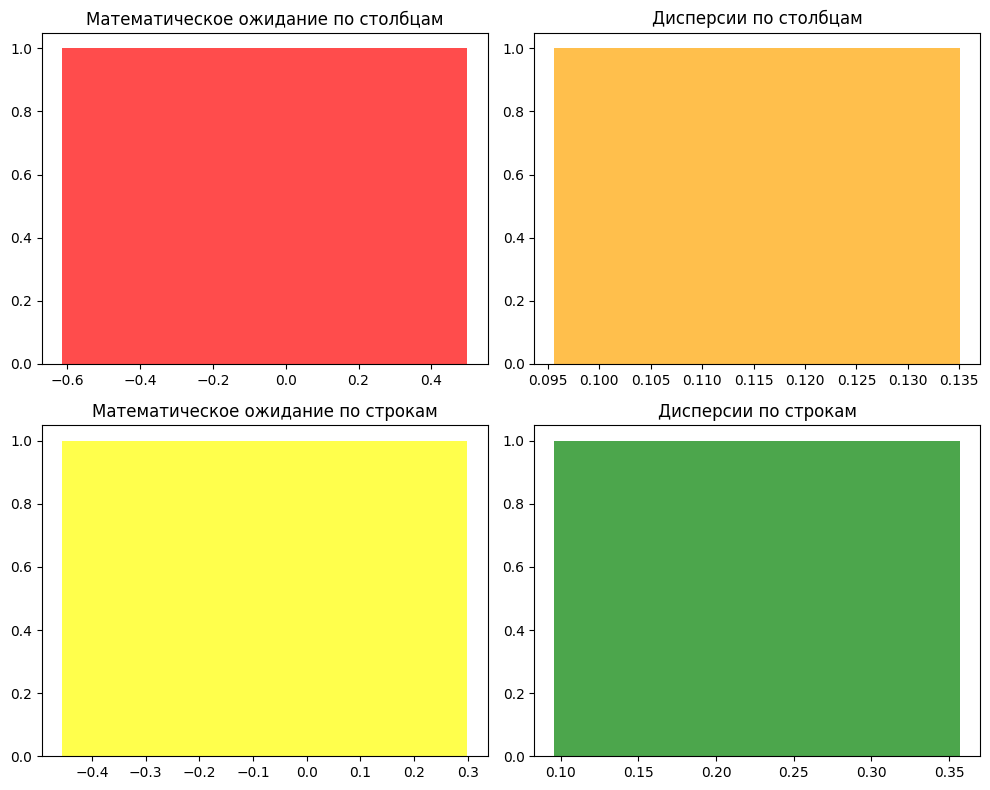

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def random_filler(m, n):
    matrix = np.random.normal(0, 1, (m, n))
    math_pred_rows = np.mean(matrix, axis=1)
    math_pred_colls = np.mean(matrix, axis=0)
    math_disp_rows = np.var(matrix, axis=1)
    math_disp_colls = np.var(matrix, axis=0)
    
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.hist(math_pred_colls, bins='auto', alpha=0.7, color='red')
    plt.title('Математическое ожидание по столбцам')
    plt.subplot(2, 2, 2)
    plt.hist(math_disp_colls, bins='auto', alpha=0.7, color='orange')
    plt.title('Дисперсии по столбцам')
    plt.subplot(2, 2, 3)
    plt.hist(math_pred_rows, bins='auto', alpha=0.7, color='yellow')
    plt.title('Математическое ожидание по строкам')
    plt.subplot(2, 2, 4)
    plt.hist(math_disp_rows, bins='auto', alpha=0.7, color='green')
    plt.title('Дисперсии по строкам')
    
    plt.tight_layout()
    plt.show()
    
random_filler(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def chess(m, n, a, b):
    chess_desk = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                chess_desk[i][j] = a
            else:
                chess_desk[i][j] = b
    return chess_desk

print(chess(3,3,1,0))
print(chess(5,5,13,52))

[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]]
[[13. 52. 13. 52. 13.]
 [52. 13. 52. 13. 52.]
 [13. 52. 13. 52. 13.]
 [52. 13. 52. 13. 52.]
 [13. 52. 13. 52. 13.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

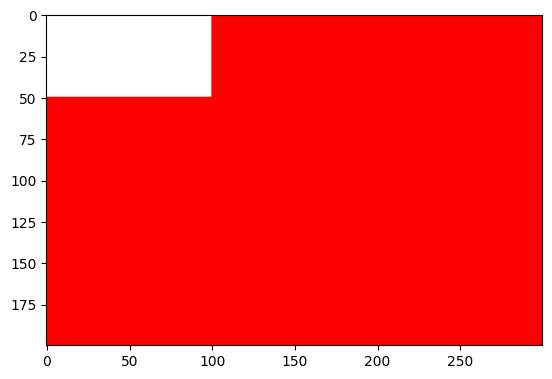

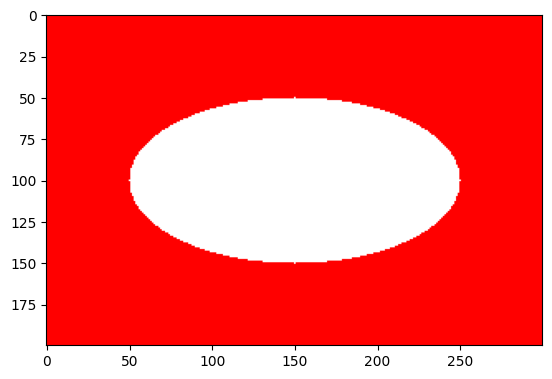

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def draw_picture(picture):
    plt.imshow(picture)
    plt.show()

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    picture = np.zeros((m, n, 3), dtype=np.uint8)
    picture[:] = background_color
    picture[0:b, 0:a] = rectangle_color
    draw_picture(picture)

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    picture = np.zeros((m, n, 3), dtype=np.uint8)
    picture[:] = background_color
    for x in range(m):
        for y in range(n):
            if ((y - n // 2) ** 2) / (a ** 2) + ((x - m // 2) ** 2) / (b ** 2) <= 1:
                picture[x, y] = ellipse_color
    draw_picture(picture)

draw_rectangle(100, 50, 200, 300, (255, 255, 255), (255, 0, 0))
draw_ellipse(100, 50, 200, 300, (255, 255, 255), (255, 0, 0))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [12]:

import numpy as np
import matplotlib.pyplot as plt

def find_ext(timeline, max = True):
    maximums = []
    minumums = []
    for i in range(1, len(timeline) - 1):
        if timeline[i] > timeline[i - 1] and timeline[i] > timeline[i + 1]:
            maximums.append(i)
        elif timeline[i] < timeline[i - 1] and timeline[i] < timeline[i + 1]:
            minumums.append(i)
    if max:
        return maximums
    else:
        return  minumums
    
def rolling_mean(timeline, window):
    rolling_mean_arr = np.zeros(len(timeline) - window)
    for i in range(len(rolling_mean_arr) - 1):
        rolling_mean_arr[i] = np.mean(timeline[i:i + window])
    return rolling_mean_arr

def calculate_timeline(timeline, window):
    timeline = np.array(timeline)
    mathmean = np.mean(timeline)
    variance = np.var(timeline)
    deviation = np.std(timeline)
    maximums = find_ext(timeline)
    minimums = find_ext(timeline, False)
    roll_mean = rolling_mean(timeline, window)

test_timeline = [1, 2, 5, 2, 1, 1, 3, 4, 6, 8, 10, 9, 7, 4, 2, 1, 1]
calculate_timeline(test_timeline, 3)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [13]:
import numpy as np

def one_hot_encoding(vect):
    elements = np.max(vect) + 1
    onehot = np.zeros((len(vect), elements))
    onehot[np.arange(len(vect)), vect] = 1
    return onehot
print(one_hot_encoding([0, 2, 3, 0]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
